In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from Utility import gradient, gradient_first
from Solver_q import *



In [6]:
pre_file  = '/central/groups/esm/zhaoyi/pyqg_run/2layer/'
file_name = 'beta16rek0p32'
start, end, step = 3000000, 6000000, 20000

ny = 256
L = 32
H = [1.0, 1.0]               # the rest depths of each layer
lam = 0.25
beta = 16.0
mu = 0.32                   # bottom drag

U = [1.0, -1.0]
dU = U[0] - U[1] 
F1 = 2.0/lam**2
F2 = 2.0/lam**2
beta1, beta2 = beta + F1*dU, beta - F2*dU


pre_file  = pre_file + file_name + '/'
u, v, q, psi = load_netcdf(pre_file, file_name, start, end, step)


In [9]:
# Plot heat flux related 

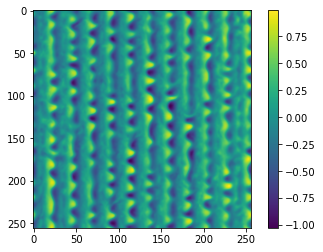

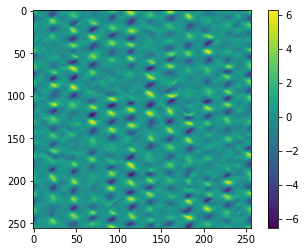

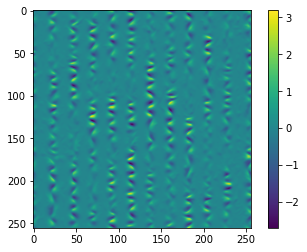

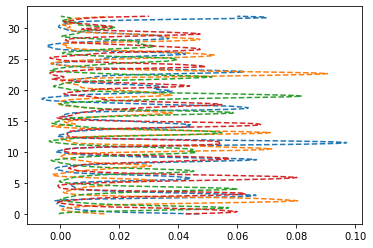

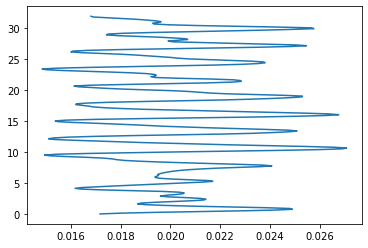

In [33]:
h = 0.5*(psi[:,:,:, 0] - psi[:,:,:, 1])
v_m = 0.5*(v[:,:,:, 0] + v[:,:,:, 1])
heat_flux_zonal_mean = np.mean(v_m * h, axis = 1)

fig = plt.figure()
im = plt.imshow(h[-1, :, :])
fig.colorbar(im)

fig = plt.figure()
im = plt.imshow(v_m[-1, :, :])
fig.colorbar(im)

fig = plt.figure()
im = plt.imshow((h*v_m)[-1, :, :])
fig.colorbar(im)

fig = plt.figure()
plt.plot(heat_flux_zonal_mean[-1, :], yy, '--')
plt.plot(heat_flux_zonal_mean[-20, :], yy, '--')
plt.plot(heat_flux_zonal_mean[-40, :], yy, '--')
plt.plot(heat_flux_zonal_mean[-80, :], yy, '--')


fig = plt.figure()
plt.plot(np.mean(heat_flux_zonal_mean[:, :], axis=0), yy)


In [27]:
nt, nx, ny, nlayers = u.shape

q_zonal_mean   = np.mean(q, axis = 1)
psi_zonal_mean = np.mean(psi, axis = 1)
dq_zonal_mean  = np.copy(q_zonal_mean)
u_zonal_mean   = np.mean(u, axis = 1)
vor_zonal_mean = np.copy(u_zonal_mean)

yy, dy = np.linspace(0, L - L/ny, ny), L/ny

flux_zonal_mean = np.mean(v * q, axis = 1)
heat_flux_zonal_mean = np.mean(v_m * h, axis = 1)

for i in range(nt):
    for j in range(nlayers):
        dq_zonal_mean[i, :, j] = gradient_first(q_zonal_mean[i, :, j], dy)
        vor_zonal_mean[i, :, j] = gradient_first(u_zonal_mean[i, :, j], dy)


# compute psi variance
psi_var_2 = np.copy(psi)
for i in range(nt):
    for j in range(nx):
        psi_var_2[i, j, :, :] -= psi_zonal_mean[i, :, :]

psi_var_2 **= 2
psi_var_2_zonal_mean = np.mean(psi_var_2, axis = 1)


dpv_zonal_mean =  np.copy(dq_zonal_mean)
dpv_zonal_mean[:,:, 0] += beta1
dpv_zonal_mean[:,:, 1] += beta2    

t_mean_steps = range(0,nt)
flux_mean    = np.mean(flux_zonal_mean[t_mean_steps, :, :], axis = 0)
flux_mean[:, 0] = np.mean(flux_mean[:, 0])
dpv_mean     = np.mean(dpv_zonal_mean[t_mean_steps, :, :],  axis = 0)
q_mean       = np.mean(q_zonal_mean[t_mean_steps, :, :],    axis = 0)
u_mean         = np.mean(u_zonal_mean[t_mean_steps, :, :],    axis = 0)
vor_mean         = np.mean(vor_zonal_mean[t_mean_steps, :, :],    axis = 0)
psi_mean = np.mean(psi_zonal_mean[t_mean_steps, :, :],    axis = 0)
psi_var_2_mean = np.mean(psi_var_2_zonal_mean[t_mean_steps, :, :],    axis = 0)

heat_flux_mean=  np.mean(heat_flux_zonal_mean[t_mean_steps, :], axis = 0)

# mu is positive
mu_mean = -flux_mean / dpv_mean


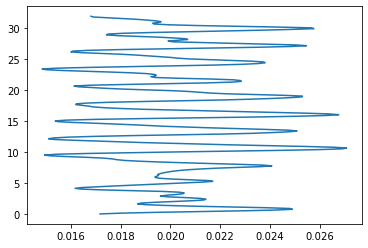

In [28]:
plt.plot(heat_flux_mean, yy)

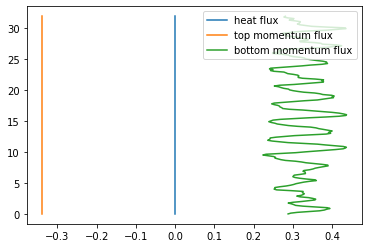

In [13]:
plt.plot(heat_flux_mean, yy, label="heat flux")
plt.plot(flux_mean[:, 0], yy, label="top momentum flux")
plt.plot(flux_mean[:, 1], yy, label="bottom momentum flux")
plt.legend()

0.0201778106369812

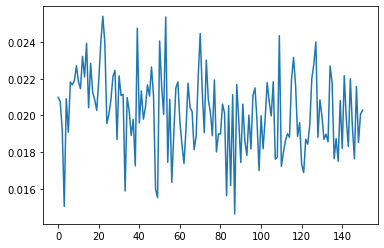

In [31]:
plt.plot(np.mean(heat_flux_zonal_mean[:, :], axis=1))
np.mean(heat_flux_mean)

In [56]:
EKE

array([3.66616248, 0.45080011])

In [36]:
uh_mean[:, :, 0].conjugate()

array([[ 1.87865704e+05-1.87865704e+05j,  1.79678437e+05-1.79678437e+05j,
         1.52856263e+05-1.52856263e+05j, ...,
         1.00794806e+05-1.00794806e+05j,  1.47171383e+05-1.47171383e+05j,
         1.77030949e+05-1.77030949e+05j],
       [ 6.61003803e+02-2.98076341e+02j,  3.92398911e+02+5.94500382e+01j,
        -2.05315671e+02+6.08365796e+02j, ...,
         8.43544603e+02+2.95936986e+02j,  1.01281227e+03+5.77904966e+02j,
         9.52219131e+02+1.84408300e+02j],
       [-3.51841054e+03-1.62601807e+03j, -3.80447058e+03-1.58685446e+03j,
        -3.63447844e+03-9.88917570e+02j, ...,
         1.23614123e+02-1.00978712e+03j, -1.37862745e+03-1.25317216e+03j,
        -2.69334222e+03-1.33201035e+03j],
       ...,
       [ 1.70786019e+03+3.69550216e+03j,  1.66672536e+03+3.99596041e+03j,
         1.03869261e+03+3.81741209e+03j, ...,
         1.06061258e+03-1.29835973e+02j,  1.31624788e+03+1.44801769e+03j,
         1.39905422e+03+2.82890580e+03j],
       [ 3.05483506e+02-6.77429678e+02j, -6.